In [1]:
'''
Sia data la funzione f(x) = e^-x^2 - e^-(x-3)^2 nell'intervallo [-4,6]:

-si tracci il grafico di f e della sua primitiva g(x) rispetto a= -4;
-si determini il punto di massimo xM di g e la sua larghezza a metà altezza.
'''

"\nSia data la funzione f(x) = e^-x^2 - e^-(x-3)^2 nell'intervallo [-4,6]:\n\n-si tracci il grafico di f e della sua primitiva g(x) rispetto a= -4;\n-si determini il punto di massimo xM di g e la sua larghezza a metà altezza.\n"

In [2]:
#Svolgimento di Aurora D'Arco

'''
"""
Created on Wed Oct 27 15:19:09 2021

@author: aury5
"""

import numpy as np
import matplotlib.pyplot as plt

#Aurora D'Arco N85001804-esame informatica 27 ottobre 2021

e = np.exp
n = 1000
b = 6
a = -4

def f(x):
    y = e(-(x**2))-e(-((x-3)**2))
    return y

x = np.linspace(a,b,1000,True)
y = np.zeros(1000)
for i in range(1000):
    y[i] = f(x[i])
plt.plot(x,y)
   
def g(x1):
      s = 0
      h = (x1-a)/n
      for i in range(1000):
          s += (f((h*i)-4)+(f((h*(i+1))-4)))*h/2
      return s
 
x1 = np.linspace(a,b,1000,True) 
y1 = np.zeros(1000)   
for i in range(1000):
    y1[i] = g(x1[i])
plt.plot(x1,y1)

g_max = np.max(y1)
indice1 = np.where(y1 == g_max)
x_max = x1[indice1]
print("il valore di x per cui g(x) è massima è: " + str(x_max))

def larg_mazza_alt():
    y2 = g_max/2
    x2 = []
    for i in range(n-1):
        if g(x1[i]) < y2 and g(x1[i+1]) > y2:
            x2.append(x1[i])
        elif g(x1[i]) > y2 and g(x1[i+1]) < y2:
            x2.append(x1[i])
        else:
            continue
    return np.abs(x2[1]-x2[0])
print("il valore della larghezza a mezza altezza è :"+ str(larg_mazza_alt()))
'''

'\n"""\nCreated on Wed Oct 27 15:19:09 2021\n\n@author: aury5\n"""\n\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n#Aurora D\'Arco N85001804-esame informatica 27 ottobre 2021\n\ne = np.exp\nn = 1000\nb = 6\na = -4\n\ndef f(x):\n    y = e(-(x**2))-e(-((x-3)**2))\n    return y\n\nx = np.linspace(a,b,1000,True)\ny = np.zeros(1000)\nfor i in range(1000):\n    y[i] = f(x[i])\nplt.plot(x,y)\n   \ndef g(x1):\n      s = 0\n      h = (x1-a)/n\n      for i in range(1000):\n          s += (f((h*i)-4)+(f((h*(i+1))-4)))*h/2\n      return s\n \nx1 = np.linspace(a,b,1000,True) \ny1 = np.zeros(1000)   \nfor i in range(1000):\n    y1[i] = g(x1[i])\nplt.plot(x1,y1)\n\ng_max = np.max(y1)\nindice1 = np.where(y1 == g_max)\nx_max = x1[indice1]\nprint("il valore di x per cui g(x) è massima è: " + str(x_max))\n\ndef larg_mazza_alt():\n    y2 = g_max/2\n    x2 = []\n    for i in range(n-1):\n        if g(x1[i]) < y2 and g(x1[i+1]) > y2:\n            x2.append(x1[i])\n        elif g(x1[i]) > y2 and g(

In [3]:
import numpy as np
import matplotlib.pyplot as plt
N=20000

def f(x):
    return np.exp(-x**2) - np.exp(-(x-3)**2)

def F(x):
    A=0
    dt=(x+4)/N
    for k in range(N):
        dA = dt/2 * (f(-4 + k*dt) + f(-4 + (k+1)*dt))
        A += dA
    return A

X=np.linspace(-4,6,N)
Y1=f(X)
Y2=F(X)

xM = X[Y2.argmax()]
yM = max(Y2)
M = (round(xM,6),round(yM,6))

hM=yM/2
d=[]
for k in range(N-1):
    if Y2[k] < hM and Y2[k+1] > hM:
        d.append(X[k])
    elif Y2[k] > hM and Y2[k+1] < hM:
        d.append((X[k]+X[k+1])/2)
FWHM = abs(d[1] - d[0])

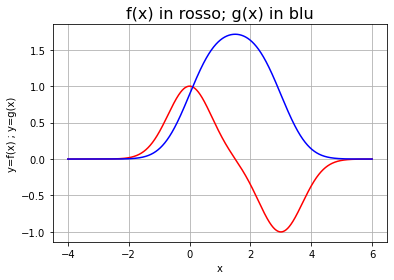

Il punto di massimo assoluto di g(x) in [-4,6] è: M = (1.499775, 1.712377) ;
La larghezza a metà altezza di g(x) è: FWHM = 3.060403 .

Segue una verifica grafica del risultato trovato:


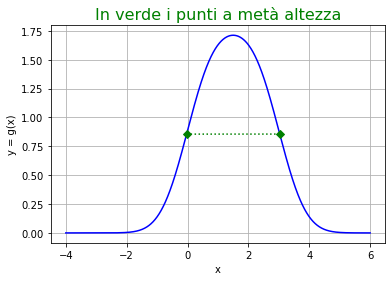

In [4]:
plt.plot(X,Y1,'red')
plt.plot(X,Y2,'blue')
plt.title('f(x) in rosso; g(x) in blu',size=16)
plt.xlabel('x')
plt.ylabel('y=f(x) ; y=g(x)')
plt.grid()
plt.show()

print('Il punto di massimo assoluto di g(x) in [-4,6] è: M =',M,';')
print('La larghezza a metà altezza di g(x) è: FWHM =',round(FWHM,6),'.\n')

print('Segue una verifica grafica del risultato trovato:')
plt.plot(X,Y2,'blue')
plt.plot([xM-FWHM/2,xM+FWHM/2],[F(xM-FWHM/2),F(xM+FWHM/2)],'D:g')
plt.title('In verde i punti a metà altezza',color='green',size=16)
plt.xlabel('x')
plt.ylabel('y = g(x)')
plt.grid()
plt.show()